# Qiskit 入門
Kifumi Numata, IBM Quantum (Jun 26, 2023)

# １量子ビット回路
まず1量子ビット回路から始めます。セルを選択して「Shift」＋「Enter」で実行できます。

In [1]:
# Qiskitライブラリーを導入
from qiskit import QuantumCircuit
from qiskit import Aer

# 描画のためのライブラリーを導入
import matplotlib.pyplot as plt

### 空の回路

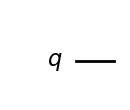

In [2]:
# １量子ビット回路を用意
qc = QuantumCircuit(1)

# 回路を描画
qc.draw(output="mpl")

### Xゲート

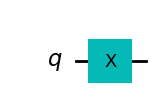

In [3]:
qc = QuantumCircuit(1)    # １量子ビット回路を用意

# Xゲートを0番目の量子ビットに操作します。
qc.x(0)

# 回路を描画
qc.draw(output="mpl")

IBM Quantumでは、初期状態は$|0\rangle$にセットされていますので、上記の量子回路は、行列ベクトル表示では

$X|0\rangle=  \begin{pmatrix}
0 & 1 \\\
1 & 0
\end{pmatrix} 
\begin{pmatrix}
1 \\\
0
\end{pmatrix} 
 =\begin{pmatrix}
0 \\\
1
\end{pmatrix} = |1\rangle$ 

となります。次にこの回路の出力ベクトルを状態ベクトルシミュレーターを使って実行してみます。

Statevector([0.+0.j, 1.+0.j],
            dims=(2,))


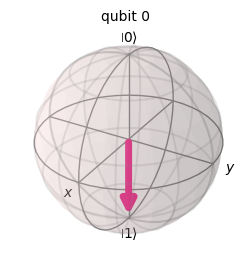

In [4]:
# 状態ベクトルシミュレーターの実行
backend = Aer.get_backend('statevector_simulator')
result = backend.run(qc).result().get_statevector(qc, decimals=3)
print(result)

# ブロッホ球の表示
from qiskit.visualization import plot_bloch_multivector
plot_bloch_multivector(result, figsize=(3,3))

縦ベクトルが横ベクトル表示で、複素数(虚部の添字は j )で表示されています。

### Hゲート

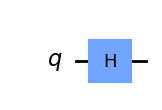

In [5]:
qc = QuantumCircuit(1)    # １量子ビット回路を用意 

# Hゲートを0番目の量子ビットに操作します。
qc.h(0)

# 回路を描画
qc.draw(output="mpl")

Statevector([0.707+0.j, 0.707+0.j],
            dims=(2,))


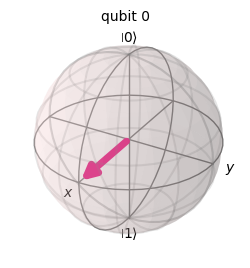

In [6]:
# 状態ベクトルシミュレーターの実行
backend = Aer.get_backend('statevector_simulator')
result = backend.run(qc).result().get_statevector(qc, decimals=3)
print(result)

# ブロッホ球の表示
plot_bloch_multivector(result, figsize=(3,3))

これは、$H|0\rangle= \frac{1}{\sqrt{2}} \begin{pmatrix}
1 & 1 \\\
1 & -1
\end{pmatrix} 
\begin{pmatrix}
1 \\\
0
\end{pmatrix} 
 =\frac{1}{\sqrt{2}}\begin{pmatrix}
1 \\\
1
\end{pmatrix} 
=\begin{pmatrix}
0.707 \\\
0.707
\end{pmatrix} 
=\frac{1}{\sqrt{2}}（|0\rangle+|1\rangle)$ です。




つまり、$H$ゲートを$|0\rangle$に実行すると、$|0\rangle$と$|1\rangle$の均等な重ね合わせ状態が作れることが分かります。

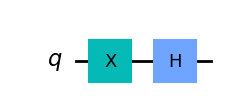

In [7]:
qc = QuantumCircuit(1)    # １量子ビット回路を用意 

# Xゲートを0番目の量子ビットに操作します。
qc.x(0)

# 次にHゲートを0番目の量子ビットに操作します。
qc.h(0)

# 回路を描画
qc.draw(output="mpl")

Statevector([ 0.707-0.j, -0.707+0.j],
            dims=(2,))


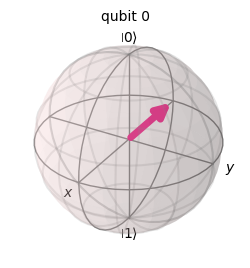

In [8]:
# 状態ベクトルシミュレーターの実行
backend = Aer.get_backend('statevector_simulator')
result = backend.run(qc).result().get_statevector(qc, decimals=3)
print(result)

# ブロッホ球の表示
plot_bloch_multivector(result, figsize=(3,3))

$H|1\rangle= \frac{1}{\sqrt{2}} \begin{pmatrix}
1 & 1 \\\
1 & -1
\end{pmatrix} 
\begin{pmatrix}
0 \\\
1
\end{pmatrix} 
 =\frac{1}{\sqrt{2}}\begin{pmatrix}
1 \\\
-1
\end{pmatrix} 
=\begin{pmatrix}
0.707 \\\
-0.707
\end{pmatrix} 
=\frac{1}{\sqrt{2}}（|0\rangle-|1\rangle)$


$|1\rangle$に$H$ゲートを実行した結果、$|0\rangle$と$|1\rangle$の均等な重ね合わせ状態になりますが、$|1\rangle$の符号がマイナスになります。

その他の量子ゲートについては、こちらを参照ください：https://qiskit.org/documentation/locale/ja_JP/tutorials/circuits/3_summary_of_quantum_operations.html

# 2量子ビット回路

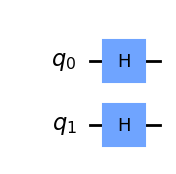

In [9]:
# ２量子ビット回路を作成します。
qc = QuantumCircuit(2)

# Hゲートを0番目の量子ビットに操作します。
qc.h(0)

# Hゲートを1番目の量子ビットに操作します。
qc.h(1)

# 回路を描画
qc.draw(output="mpl")

In [10]:
# 状態ベクトルシミュレーターの実行
backend = Aer.get_backend('statevector_simulator')
result = backend.run(qc).result().get_statevector(qc, decimals=3)
print(result)

Statevector([0.5+0.j, 0.5+0.j, 0.5+0.j, 0.5+0.j],
            dims=(2, 2))


２量子ビットの状態は、１量子ビットの積（テンソル積）で表せます。

$|q0\rangle \otimes|q1\rangle = (a|0\rangle+b|1\rangle) \otimes (c|0\rangle+d|1\rangle) $

$= ac|0\rangle|0\rangle+ad|0\rangle|1\rangle+bc|1\rangle|0\rangle+bd|1\rangle|1\rangle$

$= ac|00\rangle+ad|01\rangle+bc|10\rangle+bd|11\rangle$

(ただし、$|ac|^2+ |ad|^2+ |bc|^2+ |bd|^2=1$ )


Qiskitの初期値は、$|0\rangle|0\rangle=|00\rangle$なので、$H$をそれぞれの量子ビットに操作させることで均等な重ね合わせの状態になります。

$H|0\rangle \otimes H|0\rangle=\frac{1}{\sqrt{2}}(|0\rangle+|1\rangle) \otimes \frac{1}{\sqrt{2}}(|0\rangle+|1\rangle) = \frac{1}{2}(|00\rangle+|01\rangle+|10\rangle+|11\rangle)$

$$ 
=\frac{1}{2}\left( \begin{bmatrix} 1 \\ 1 \end{bmatrix} \otimes \begin{bmatrix} 1 \\ 1 \end{bmatrix}\right) = \frac{1}{2}\begin{bmatrix} 1 \\ 1 \\ 1 \\ 1 \end{bmatrix}=\frac{1}{2}\left(\begin{bmatrix} 1 \\ 0 \\ 0 \\ 0 \end{bmatrix}+\begin{bmatrix} 0 \\ 1 \\ 0 \\ 0 \end{bmatrix}+\begin{bmatrix} 0 \\ 0 \\ 1 \\ 0 \end{bmatrix}+\begin{bmatrix} 0 \\ 0 \\ 0 \\ 1 \end{bmatrix}\right)
$$


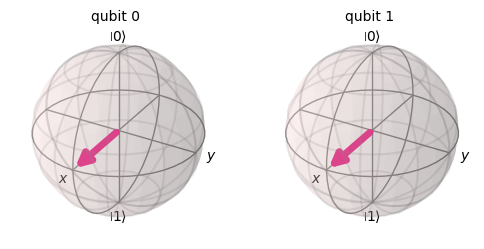

In [11]:
# ブロッホ球の表示
plot_bloch_multivector(result, figsize=(3,3))

次に、この状態を測定してみましょう。

まず、測定回路を追加します。

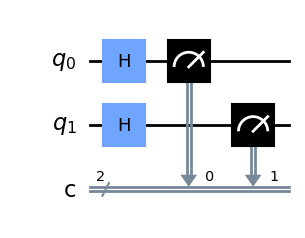

In [12]:
# ２量子ビットと2古典ビットの回路を作成します。
qc = QuantumCircuit(2,2)

# ゲートを適用します。
qc.h(0)
qc.h(1)

# 測定ゲートを追加
qc.measure(0,0)    # 量子ビットq0を測定して、古典レジスターc0に入れます
qc.measure(1,1)    # 量子ビットq1を測定して、古典レジスターc1に入れます

# 回路を描画
qc.draw(output="mpl")

次にQASMシミュレーター（量子計算シミュレーター）で計算させ、測定します。1024回実行した結果、それぞれの状態が測定された回数を表示し、その測定確率をヒストグラムで表示します。

{'01': 262, '10': 273, '00': 245, '11': 244}


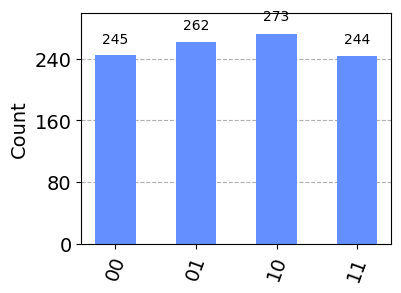

In [14]:
# QASMシミュレーターで実験
backend = Aer.get_backend('qasm_simulator')
job = backend.run(qc, shots=1024)
result = job.result()

#  測定された回数を表示
counts = result.get_counts(qc)
print(counts)

## ヒストグラムで測定された確率をプロット
from qiskit.tools.visualization import plot_histogram
plot_histogram(counts, figsize=(4,3) )

$|00\rangle$、$|01\rangle$、$|10\rangle$、$|11\rangle$の状態がほぼ25%ずつ均等に測定されました。

次は、$CNOT$ゲート（$CX$ゲート）の実験を行います。

$CNOT$ゲートは、２量子ビットにかかる量子ゲートで、制御ビットが1のときのみ、目標ビットの値を反転します。
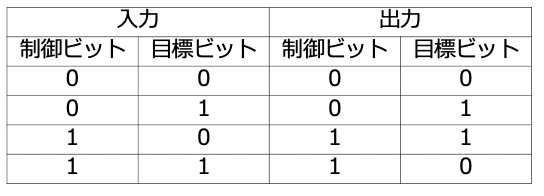
まず、q0とq1が両方とも0の場合を計算してみましょう。

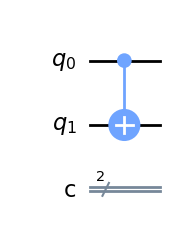

In [15]:
# ２量子ビット回路を作成します。 
qc = QuantumCircuit(2,2)

# q0, q1が0の場合
qc.cx(0,1)   # CNOTゲートの制御ビットをq0、目標ビットをq1にセットします。

# 回路を描画
qc.draw(output="mpl")

In [16]:
## 状態ベクトルシミュレーターの実行
backend = Aer.get_backend('statevector_simulator')
result = backend.run(qc).result().get_statevector(qc, decimals=3)
print(result)

Statevector([1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
            dims=(2, 2))


$|00\rangle$ に$CX$ゲートを操作しても$|00\rangle$ のままです。

次に、$|01\rangle$ に$CX$ゲートを操作します。

ここで、Qiskitでは、最下位ビット(LSB)が右端で、多くの量子情報の教科書とは逆であることに注意してください。つまり、1量子ビット目が一番右のビットで、2量子ビット目が右から２番目のビットです。$|01\rangle$ とは、q0が1で、q1が0を表しています。


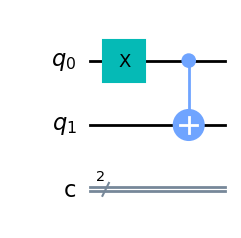

In [17]:
qc = QuantumCircuit(2,2)

# q0=1, q1=0の場合
qc.x(0)    # q0を1にします。
qc.cx(0,1)   # CNOTゲートの制御ゲートをq0、目標ゲートをq1にセットします。

# 回路を描画
qc.draw(output="mpl")

In [18]:
# 状態ベクトルシミュレーターの実行
backend = Aer.get_backend('statevector_simulator')
result = backend.run(qc).result().get_statevector(qc, decimals=3)
print(result)

Statevector([0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j],
            dims=(2, 2))


$|01\rangle$ に$CX$ゲートを操作すると$|11\rangle$ になりました。

QASMシミュレーターで計算してみましょう。

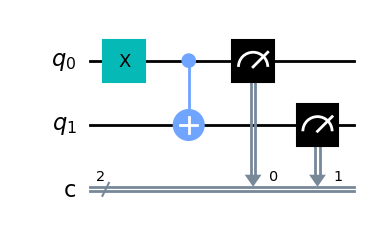

In [19]:
# 回路を測定
qc.measure(0,0)
qc.measure(1,1)

# 回路を描画
qc.draw(output="mpl")

{'11': 1024}


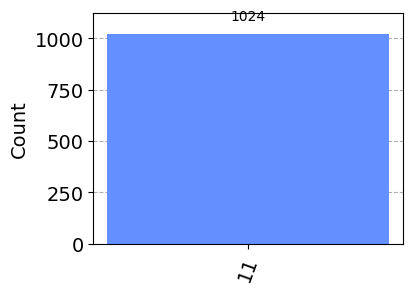

In [20]:
# QASMシミュレーターで実験
backend = Aer.get_backend('qasm_simulator')
job = backend.run(qc, shots=1024)
result = job.result()

#  測定された回数を表示
counts = result.get_counts(qc)
print(counts)

# ヒストグラムで測定された確率をプロット
plot_histogram(counts, figsize=(4,3) )

$|11\rangle$の状態が100%測定されます。

# 量子もつれと実デバイスでの測定
エンタングルメント状態を作り実デバイスで測定してみます。

量子計算上でも重要な状態となる、量子もつれ状態（エンタングルメント状態）を生成してみましょう。
量子もつれ状態とは2つの量子ビットが、強い関連性で結ばれた状態を指します。
量子テレポーテーションなどで利用されます。

2量子ビットの量子もつれ状態の1つの例が次のような形になります。
$$\frac{1}{\sqrt{2}}|00\rangle + \frac{1}{\sqrt{2}}|11\rangle$$

これは、「片方の量子ビットが$|0\rangle$の場合に、もう片方の量子ビットも$|0\rangle$になっている」状態と、「片方の量子ビットが$|1\rangle$の場合に、もう片方の量子ビットも$|1\rangle$になっている」状態の重ね合わせ状態になっています。つまり、片方の量子ビットの状態が決まると、残りの量子ビットが確定するような状態となっています。別の言い方をすると、$|00\rangle$と$|11\rangle$という2つのデータが半々の確率で観測されることを示しています。<br>

上記の状態をつくるには、まず片方の量子ビットを重ね合わせの状態にします。つまり、
$$ |00\rangle \rightarrow  \frac{1}{\sqrt{2}}|00\rangle  + \frac{1}{\sqrt{2}}|01\rangle  $$

その後、CXゲートを作用させます。量子ビット0をコントロールビット、量子ビット1をターゲットビットとします。すると、右側が1の量子ビットに対して、残った方の量子ビットを反転させます。
$$ CX(\frac{1}{\sqrt{2}}|00\rangle  + \frac{1}{\sqrt{2}}|01\rangle) \rightarrow \frac{1}{\sqrt{2}}|00\rangle  + \frac{1}{\sqrt{2}}|11\rangle $$

では、実際にこの量子状態を作ってみましょう。<br>


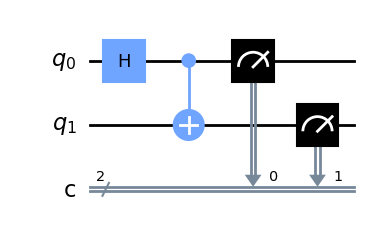

In [21]:
# 2量子ビット回路の用意
qc = QuantumCircuit(2,2)

# 2量子ビットのエンタングルメント回路の作成
qc.h(0)
qc.cx(0, 1)

# 回路を測定
qc.measure(0, 0)
qc.measure(1, 1)

# 回路を描画
qc.draw(output="mpl")

{'00': 504, '11': 520}


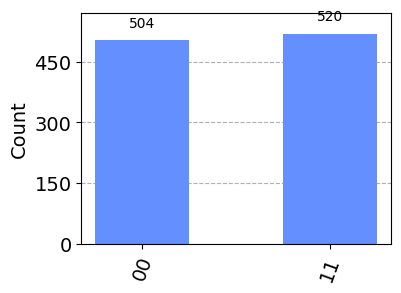

In [22]:
# QASMシミュレーターで実験
backend = Aer.get_backend('qasm_simulator')
job = backend.run(qc, shots=1024)
result = job.result()

#  測定された回数を表示
counts = result.get_counts(qc)
print(counts)

# ヒストグラムで測定された確率をプロット
plot_histogram(counts, figsize=(4,3))

実デバイスで計算してみましょう。

IBM Providerをインストールしていない方はインストールします。IBM Quantum Labで実行している方はインストールの必要はありません。IBM Providerについては、こちらのガイドも参照してください：[Qiskit IBM Quantum Provider documentation](https://qiskit.org/ecosystem/ibm-provider/index.html)

In [ ]:
# IBM Providerをインストールしていない方はインストールします。
#!pip install qiskit-ibm-provider

実デバイスで計算してみましょう。

初めて実機で実行する方は、[IBM Quantum Platform](https://quantum-computing.ibm.com/)からIBM Quantumの API TokenをコピーしてQiskitの設定に保存します。

In [22]:
from qiskit_ibm_provider import IBMProvider

# 初めての場合のみ以下を実行し、Localに認証情報を保存します。IBM Quantum Labの場合は必要ありません。
# IBMProvider.save_account(token='<IBM Quantum API key>')

# ご自分のHub情報に更新して実行します。
provider = IBMProvider(instance='ibm-q/open/main')
#provider = IBMProvider(instance='ibm-q-internal/deployed/default')

In [29]:
# 以下でデバイスを指定できます。
real_backend = provider.get_backend('ibmq_lima')   # 例）ibmq_limaを使う場合

In [30]:
#一番空いているバックエンドを自動的に選択することができます
from qiskit_ibm_provider import least_busy

small_devices = provider.backends(simulator=False, operational=True, min_num_qubits=2)
real_backend = least_busy(small_devices)
print(real_backend.name)

ibm_seattle


In [31]:
# 実機のバックエンドでの実行に最適な回路に変換します
from qiskit import transpile
qc_compiled = transpile(qc, real_backend)
# 実機のバックエンドで実行します
job = real_backend.run(qc_compiled, shots=1024)

In [32]:
job_id = job.job_id()
print(job_id)

cib9kau3instr56cd4og


In [33]:
# ジョブの実行状態を確認します
retrieve_job = provider.backend.retrieve_job(job_id)
retrieve_job.status()

<JobStatus.RUNNING: 'job is actively running'>

IBM QuantumのJobsからも実行状況を確認できます：https://quantum-computing.ibm.com/jobs

In [23]:
# 結果を確認します
# Notebookのセッションが切れた場合は、このセルから実行します。
from qiskit_ibm_provider import IBMProvider
provider = IBMProvider()
real_backend = provider.get_backend('ibm_brisbane')
retrieve_job = provider.backend.retrieve_job('ci7c0rcoir23fni48jeg') #ご自分のjob_idを入力
retrieve_job.status()

<JobStatus.DONE: 'job has successfully run'>

{'00': 485, '01': 30, '10': 17, '11': 492}


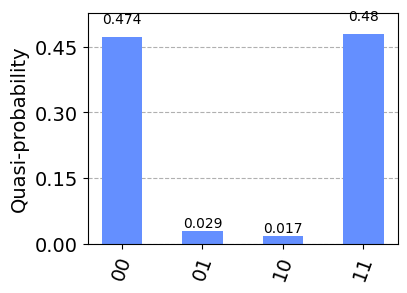

In [24]:
from qiskit.tools.visualization import plot_distribution

real_result= retrieve_job.result()
print(real_result.get_counts())
plot_distribution(real_result.get_counts(), figsize=(4,3))

# Qiskit Runtime Primitiveを使った実行

Qiskit Runtime Primitiveには、デフォルトで回路の最適化やエラー緩和機能が組み込まれています。

Sampler Primitiveでは、（擬）確率分布を求めます。

{'00': 0.4999999999999999, '11': 0.4999999999999999}


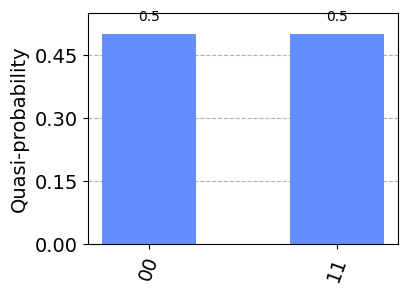

In [8]:
from qiskit.circuit import QuantumCircuit
from qiskit.primitives import Estimator, Sampler
from qiskit.tools.visualization import plot_distribution

# ベル状態の回路を準備
qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0, 1)
qc.measure_all()

# シミュレーターで回路を実行し、確率分布を求める
sampler = Sampler()
job = sampler.run(qc)
prob_distribution = job.result().quasi_dists[0].binary_probabilities()

# ヒストグラムで確率をプロット
print(prob_distribution)
plot_distribution(prob_distribution, figsize=(4,3))

Qiskit Runtimeのインストールをインストールしていない方はインストールします。IBM Quantum Labで実行している方はインストールの必要はありません。IBM Providerについては、こちらのガイドも参照してください：https://qiskit.org/ecosystem/ibm-runtime/locale/ja_JP/getting_started.html

In [ ]:
# Qiskit Runtimeのインストール
#!pip install qiskit-ibm-runtime

In [26]:
from qiskit_ibm_runtime import QiskitRuntimeService, Session, Sampler

# 初めての場合のみ以下を実行し、Localに認証情報を保存します。IBM Quantum Labの場合は必要ありません。
# QiskitRuntimeService.save_account(channel='ibm_quantum', token=<IBM Quantum API key>)

service = QiskitRuntimeService(
    channel='ibm_quantum',
    #instance='ibm-q/open/main', #ご自分のHub情報に更新してください
    instance='ibm-q-internal/deployed/default',
)

In [ ]:
# Queの少ないデバイスを探す場合
from qiskit_ibm_provider import least_busy

small_devices = service.backends(simulator=False, operational=True, min_num_qubits=2)
real_backend = least_busy(small_devices)
print(real_backend.name)

In [51]:
# デバイス名で指定する場合
real_backend = service.get_backend('ibm_cusco')

In [52]:
with Session(service, backend=real_backend) as session:
    sampler = Sampler(session=session)
    job_real = sampler.run(qc)
    job_id = job_real.job_id()
    print(job_id)

cib9tve3instr56cm0hg


In [53]:
retrieve_job = service.job(job_id)
retrieve_job.status()

<JobStatus.QUEUED: 'job is queued'>

In [28]:
# 結果を確認します
# Notebookのセッションが切れた場合は、このセルから実行します。

from qiskit_ibm_runtime import QiskitRuntimeService
service = QiskitRuntimeService()
retrieve_job = service.job('ci7sg17hmv10ico1r1s0') #ご自分のjob_idを入力
retrieve_job.status()

<JobStatus.DONE: 'job has successfully run'>

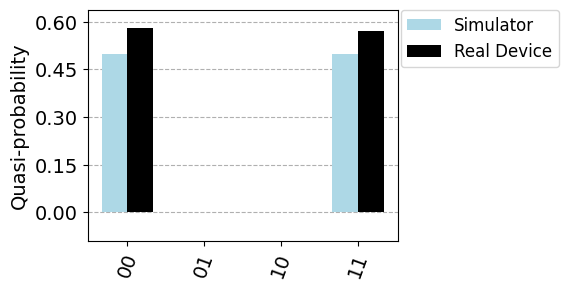

In [29]:
prob_distribution_real = retrieve_job.result().quasi_dists[0].binary_probabilities()

plot_distribution(
    data=[prob_distribution, prob_distribution_real], 
    legend=['Simulator', 'Real Device'], 
    color=['lightblue', 'black'], 
    bar_labels = False,
    figsize=(4,3)
)

Estimatorは、Observables (観測量)の期待値を求めます。measureは入れず、Observables (観測量) を設定する必要があります。

In [21]:
from qiskit.circuit import QuantumCircuit
from qiskit.primitives import Estimator, Sampler
from qiskit.quantum_info import SparsePauliOp
from qiskit.tools.visualization import plot_distribution

# 重ね合わせの回路を準備
qc = QuantumCircuit(1)
qc.h(0)

# オブザーバブルの準備
obs = list(SparsePauliOp(['Z', 'X']))

# シミュレーターで回路を実行し、オブザーバブルの期待値を求める。
estimator = Estimator()
job = estimator.run([qc]*len(obs), observables=obs)
print('Z:', job.result().values[0], 'X:', job.result().values[1])

Z: 0.0 X: 0.9999999999999998


In [30]:
# Qiskitバージョンの確認
import qiskit.tools.jupyter
%qiskit_version_table